In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [140]:
data = pd.read_csv('../data/data.csv')
data.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count,log_total_crime_count,youth_school_poverty_interaction
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,4804.0,913.5,6430.5,7584.5,73000.0,819.25,240000.000000,19732.5,9.890073,1.752000e+10
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,3236.5,618.0,5552.0,5527.5,86000.0,819.25,245000.000000,14934.0,9.611463,2.107000e+10
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,327.0,45.0,325.0,419.5,82000.0,819.25,249833.333333,1116.5,7.018849,2.048633e+10
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,94.0,30.5,171.0,108.5,74000.0,800.00,228000.000000,404.0,6.003887,1.687200e+10
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,33.0,15.5,37.0,52.5,86000.0,829.00,255000.000000,138.0,4.934474,2.193000e+10


In [141]:
# check for null values
data.isna().sum()

state                                0
year                                 0
total_pop                            0
white_pop                            0
black_pop                            0
hispanic_pop                         0
asian_pop                            0
native_pop                           0
islander_pop                         0
multi_race_pop                       0
median_income                        0
poverty_rate                         0
unemployment_rate                    0
unemployed_15_weeks                  0
labor_force_participation_rate       0
hs_grad_rate                         0
bachelors_grad_rate                  0
zhvi                                 0
crude_rate_suicide                  12
crude_rate_od                       28
crimes_against_society              45
fraud_and_other_financial_crimes    45
property_crime                      45
violent_crime                       45
youth_not_in_school                  0
youth_in_foster_care     

In [142]:
#filling all null with 0 temporary
data.fillna(0, inplace=True)

In [143]:
# Separate features and target variable

X = data.drop(columns = ['total_crime_count', 'log_total_crime_count', 'crimes_against_society', 
    'fraud_and_other_financial_crimes', 'property_crime', 'violent_crime', 'state', 'year'
]) # Features
y = data['log_total_crime_count']               # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:


# Initialize and fit Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


# Predict on training and testing data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)



# Calculate training and testing scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
#print("Training Scores:")
#print(f"MSE: {train_mse}, MAE: {train_mae}, R2: {train_r2}")

#print("\nTesting Scores:")
#print(f"MSE: {test_mse}, MAE: {test_mae}, R2: {test_r2}")

# Perform cross-validation (using 5 folds here)
cv_r2 = cross_val_score(gbr, X, y, cv=5, scoring='r2')

print("\nCross-Validation Scores (averaged across 5 folds):")
print(f" R2: {np.mean(cv_r2)}")

print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)



Cross-Validation Scores (averaged across 5 folds):
 R2: -0.20962857854099576
Training MSE: 0.3135592563863187
Training R²: 0.9697499399663334
Testing MSE: 3.7246115841661975
Testing R²: 0.5985985605541186


In [145]:

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [2,3, 4, 5],                 # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split an internal node
  
}



# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  

print("Best Parameters:", best_params)
print("Best Cross-Validated MSE:", best_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated MSE: 0.5787168540395954


In [146]:
# Predict on training and testing data
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


# Calculate training and testing scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
#print("Training Scores:")
#print(f"MSE: {train_mse}, MAE: {train_mae}, R2: {train_r2}")

#print("\nTesting Scores:")
#print(f"MSE: {test_mse}, MAE: {test_mae}, R2: {test_r2}")

# Perform cross-validation (using 5 folds here)
cv_r2 = cross_val_score(gbr, X, y, cv=5, scoring='r2')

#print("\nCross-Validation Scores (averaged across 5 folds):")
#print(f" R2: {np.mean(cv_r2)}")
print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)
print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated R²: 0.5787168540395954
Training MSE: 0.0023647185266350017
Training R²: 0.999771868072983
Testing MSE: 3.872287706203367
Testing R²: 0.5826835029385806


In [155]:
# XGBoost Regressor model without hyperparameter tuning
xgb_base_model =XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)

# Training the base model
xgb_base_model.fit(X_train, y_train)

# Making predictions on training and testing sets
y_train_pred = xgb_base_model.predict(X_train)
y_test_pred = xgb_base_model.predict(X_test)

# Evaluating the model on training, validation, and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train= r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)



print("Training MSE:", mse_train)
print("Training R²:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R²:", r2_test)



Training MSE: 0.445804315391058
Training R²: 0.9569918379726213
Testing MSE: 3.906870746634575
Testing R²: 0.5789564882161555


In [203]:


# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],            # Number of trees
    'max_depth': [2, 3, 4],                     # Tree depth
    'learning_rate': [0.01, 0.05, 0.1],         # Learning rate for step size
    'reg_lambda': [0.5, 1, 5],                  # L2 regularization
    'reg_alpha': [0, 0.1, 0.5]                  # L1 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                             # 5-fold cross-validation
                    
    n_jobs=-1,                        # Use all available cores
   
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
# Evaluate the best model on the test set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)
print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
Best Cross-Validated R²: 0.6169390140293526
Training MSE: 0.0054324645377361635
Training R²: 0.9994759128456574
Testing MSE: 3.8917281177604033
Testing R²: 0.58058840952922


In [ ]:
### SVM

In [161]:


# Define the SVM pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Scale features for SVR
    ('svr', SVR(C=1.0, epsilon=0.1))    # Basic SVR model with default parameters
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on training and testing sets

train_pred_log = pipeline.predict(X_train)
y_test_pred_log = pipeline.predict(X_test)

# Evaluate the model performance
train_mse_log = mean_squared_error(y_train, y_train_pred)
train_r2_log = r2_score(y_train, y_train_pred)

test_mse_log = mean_squared_error(y_test, y_test_pred)
test_r2_log = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse_log)
print("Training R²:", train_r2_log)
print("Testing MSE:", test_mse_log)
print("Testing R²:", test_r2_log)


Training MSE: 1.5208822393231012
Training R²: 0.8532756469259553
Testing MSE: 4.3388245823710525
Testing R²: 0.5324048176538124


In [163]:


# Define the SVM pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for SVR
    ('svr', SVR())                 # SVR model without specific parameters (GridSearchCV will tune them)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10],              # Regularization strength
    'svr__epsilon': [0.01, 0.1, 0.5],    # Insensitivity margin
    'svr__kernel': ['linear', 'rbf']      # Kernels to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions with the best estimator on the test set
y_test_pred_log = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set
test_mse_log = mean_squared_error(y_test, y_test_pred_log)
test_r2_log = r2_score(y_test, y_test_pred_log)

print("Best Parameters:", best_params)
print("Best Cross-Validated R²:", best_score)
print("Testing MSE:", test_mse_log)
print("Testing R²:", test_r2_log)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'}
Best Cross-Validated R²: 0.3673998237350296
Testing MSE: 4.588261340143201
Testing R²: 0.5055230149858255


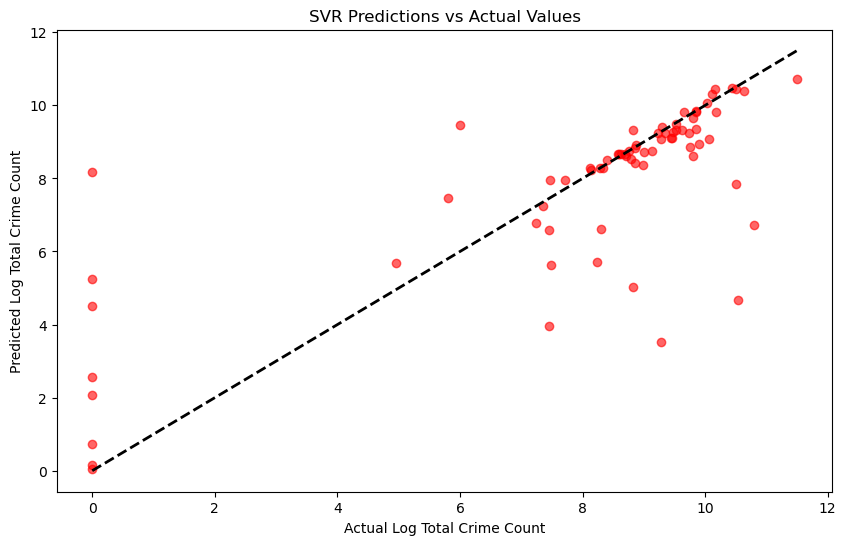

In [207]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Total Crime Count')
plt.ylabel('Predicted Log Total Crime Count')
plt.title('SVR Predictions vs Actual Values')
plt.show()


In [189]:
#stacking
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('gradient_boosting', GradientBoostingRegressor(learning_rate= 0.01, max_depth=4, n_estimators= 500,random_state=42)),
# Define the meta-modelrandom_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('linear_regression', LinearRegression())
]

meta_model = LinearRegression()

# Create the stacking ensemble
stacked_ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacked model on the training data
stacked_ensemble.fit(X_train, y_train)

# Evaluate the stacked model on the test data
ensemble_train_score = stacked_ensemble.score(X_train, y_train)
ensemble_test_score = stacked_ensemble.score(X_test, y_test)

ensemble_train_score, ensemble_test_score


(0.980300975175871, 0.6526745036172903)

In [201]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Initialize the parameter grid for the Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5]
}

# Initialize the GridSearchCV for Random Forest with the specified parameter grid
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', verbose=1)

# Define the base models with the corrected Gradient Boosting model
tuned_base_models = [
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, random_state=42)),
    ('random_forest', rf_grid_search),
    ('linear_regression', LinearRegression())  # Keeping linear regression as is for diversity
]

# Define the stacking ensemble, using Linear Regression as the meta-model
tuned_stacked_ensemble = StackingRegressor(estimators=tuned_base_models, final_estimator=LinearRegression(), cv=5)

# Fit the tuned stacked model on the training data
tuned_stacked_ensemble.fit(X_train, y_train)

# Evaluate the tuned stacked model on the test data
tuned_ensemble_train_score = tuned_stacked_ensemble.score(X_train, y_train)
tuned_ensemble_test_score = tuned_stacked_ensemble.score(X_test, y_test)

tuned_ensemble_train_score, tuned_ensemble_test_score


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


(0.9815444102073638, 0.6434692197400564)